## <font color='white'>Módulo IV: Machine Learning </font>

### Ponderaciones 
- Asistencia: **20%**
- Examen Final: **40%**
- Examen Parcial: **40%** (Semana 5)  

### Agenda por clase
Inicio ~7:00pm <br>
- 5 minutos de tolerancia.
- Primera mitad de la sesión (~ 1 hora 20 minutos).
- 10 minutos de descanso.
- Segunda mitad de la sesión (~ 1 hora 20 minutos).

Fin ~9:55pm

### Puntos importantes
- El material utilizado en clase (notebooks, extras, etc.) se va a compartir de manera semanal. 
- Se dejarán dos tareas, la primera estará disponible tras la cuarta clase y la segunda tras la septima clase, la primera tarea se entregará el día de la sexta clase, y la segunda tarea día de la novena clase, los envios de la tarea deben cumplir lo siguiente para ser calificadas:
  - Deben ser enviadas en un archivo IPYNB.
  - El asunto del correo debe ser de formato Tarea "Tarea #" - "Clave Unica".
  - Enviar la tarea a juan.ramirez.cano@itam.mx a mas tardar a las 11:59 pm del día de entrega.
- El examen final puede exentarse obteniendo un promedio mayor o igual a 8.00 considerando las tareas y el examen parcial, la calificación del examen final será igual al promedio de las tareas y el examen parcial.

-----

## <font color='white'> Parte 2: Selección y Entrenamiento de Modelos </font>

### Segregación de Entrenamiento y Testeo

Para probar correctamente nuestros algoritmos de aprendizaje, necesitamos reservar una porción de los datos para pruebas. Debemos asegurarnos de que estos datos nunca se utilicen de ninguna manera para construir el modelo. Esto significa que no pueden participar en la escalación de datos ni en la sintonización de hiperparámetros. Si permitimos que los datos de prueba se utilicen de alguna manera, corremos el riesgo de una fuga de datos, en la que el aprendizaje ha experimentado al menos algún aspecto de los datos de prueba. Los datos de prueba ya no se pueden utilizar como una evaluación independiente del aprendizaje.

En la Guía de Usuarios de scikit-learn, sección 3.1 (no incluyendo la sección 3.1.1), se explica que el primer paso en la validación cruzada (Cross-Validation, por sus siglas en inglés) y prueba de un algoritmo de aprendizaje automático es dividir los datos en conjuntos de entrenamiento y prueba. Scikit-learn proporciona una función de ayuda llamada train_test_split para hacer esta división. En la sección 3.1 de la Guía de Usuarios, se puede encontrar un enlace a la descripción detallada de esta función.

En la descripción de la función train_test_split, se menciona el parámetro test_size, que indica el tamaño proporcional del conjunto de prueba. El valor predeterminado de este parámetro es 0.25, lo que significa que el 25% de los datos se utilizarán para la prueba. Además, en la sección siguiente se presenta un ejemplo simple del uso de train_test_split.

Es importante leer la documentación de las funciones, pues es la única forma de estar seguro de su trabajo, ya que estas cambian frecuentemente.

A continuación tenemos de un ejemplo que hace uso de la la función `train_test_split` para segregar los datos que un modelo de regresión líneal va a usar para predecir el progreso de la diabetes en función de dos variables clave (Consulte la sección 7.2.3 de la Guía de Usuarios, *Diabetes dataset* para mas información), y mostraremos los resultados en función de manera segregada en cada variable independiente.

Error Cuadratico Medio (MSE): 2817.808297221584 

Explained Variance (R2): 0.5103942572821252 



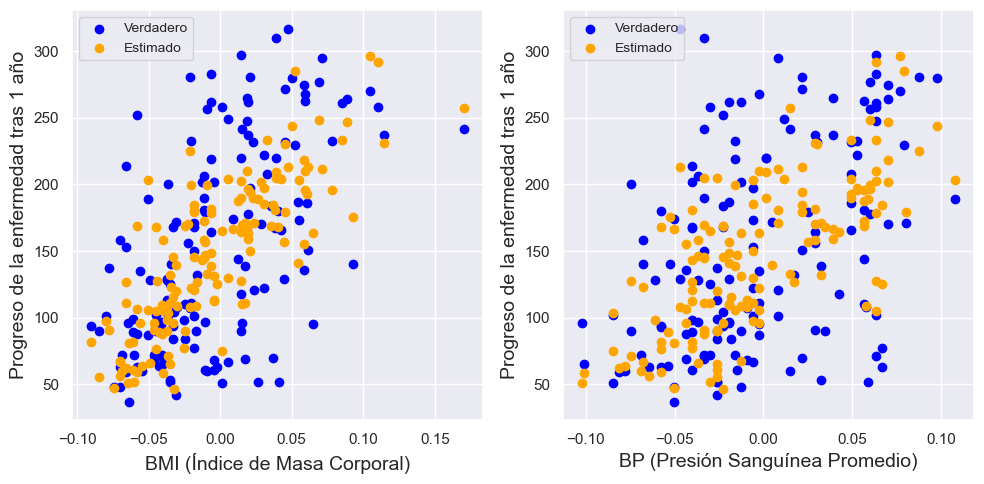

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from ipywidgets import interact, FloatSlider, IntSlider
from sklearn import preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
sns.set_theme()

# Cargamos los datos
# X: Medidas biometricas del paciente
# Y: Progresión de la enfermedad despues de un año
X, y = datasets.load_diabetes(return_X_y=True)
 
# Separamos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

# NOTA: De no usar train_test_split, podriamos usar slicing (aunque esto
#       es mucho menos eficiente), de la siguiente forma:
# X_train = X[:-5]
# X_test = X[-5:]
# y_train = y[:-5]
# y_test = y[-5:]

# Creamos un objeto de regresión lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo utilizando nuestros datos de entrenamiento
regr.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
coefs = regr.coef_
coefs_n = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

# Generamos predicciones utilizando nuestros datos de testeo
y_pred = regr.predict(X_test)
residuals = y_test - y_pred

# Calculamos el MSE del ajuste
MSE = mean_squared_error(y_test, y_pred)
print('Error Cuadratico Medio (MSE):', MSE, '\n')

# Calculamos el R2 del ajuste
R2 = r2_score(y_test, y_pred)
print('Explained Variance (R2):', R2, '\n')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# Graficamos Y_test Bs Y_Pred como función de BMI (Indice de Masa Corporal)
X_plot_1 = X_test[:, np.newaxis, 2]
axs[0].scatter(X_plot_1, y_test, color='blue', label="Verdadero")
axs[0].scatter(X_plot_1, y_pred, color='orange', label="Estimado")
axs[0].set_xlabel("BMI (Índice de Masa Corporal)", fontsize="14")
axs[0].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[0].legend(fontsize="10")

# Graficamos Y_test Bs Y_Pred como función de BP (Presión Sanguínea Promedio)
X_plot_2 = X_test[:, np.newaxis, 3]
axs[1].scatter(X_plot_2, y_test, color='blue', label="Verdadero")
axs[1].scatter(X_plot_2, y_pred, color='orange', label="Estimado")
axs[1].set_xlabel("BP (Presión Sanguínea Promedio)", fontsize="14")
axs[1].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[1].legend(fontsize="10")

plt.tight_layout()
plt.show()

### Fin 1era Sesión
--- 

Por supuesto, en el grafico anterior solo mostramos 2 de las variables usadas para entender el progreso de la diabetes depues de 1 año, pero en nuestra base de datos contamos con 10 variables, podemos visualizar la relevancia general de las variables en el modelo con el siguiente grafico:

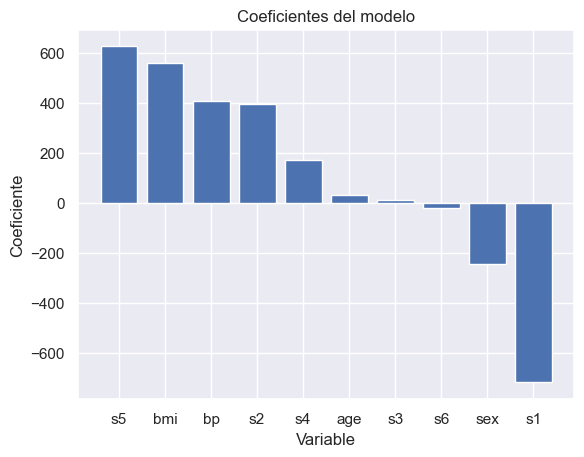

In [2]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.show()

De este grafico podemos reflexionar que las variables mas relevantes para la predicción del avance de la diabetes son: S1, S5, S2, BP, y BMI. Es muy importante recordar que si bien $\beta_i$ se puede interpretar como la sensibilidad de la variable objetivo $Y$ a la variable $X_i$, esta interpretación es relativa, pues la presencia de todas las demas variables $X_j$ afecta el valor de $\beta_i$. Para un resumen sobre la forma que toman los parametros $B_i$ en presencia de variables $X_j$ ver este [enlace](https://stats.stackexchange.com/questions/9801/analytical-solution-to-linear-regression-coefficient-estimates).  

Nota: Las variables "SX" son metricas de serum sanguineo, para mas detalles por favor consultar el [paper](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf) original.

### Paréntesis: Validando los supuestos en una regresión lineal

La mayoría de las validaciones directas que se pueden hacer sobre los supuestos de la regresión lineal (y sobre muchos otros modelos) se hace directamente sobre los residuales de nuestro modelo.

Antes de analizar las pruebas especificas, grafiquemos los residuales del ejemplo anterior:

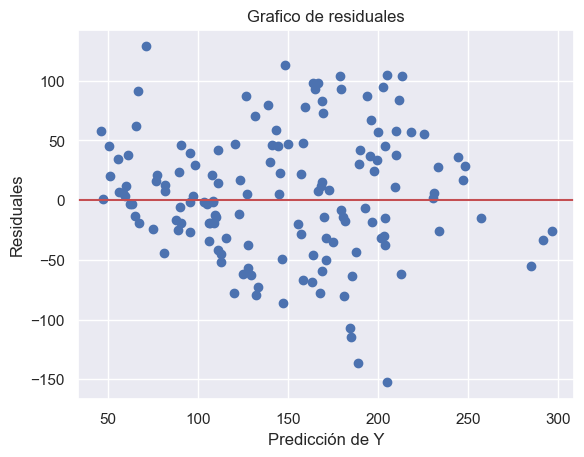

In [3]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicción de Y')
plt.ylabel('Residuales')
plt.title('Grafico de residuales')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Es importante meditar si este grafico es congruente con los supuestos de la regresión lineal, a manera de recordatorio:

>Las regresiones lineales, junto con el metodo de estimacion de minimos cuadrados (tambien conocido como _ordinary least squares (OLS)_) necesitan una serie de supuestos para estar correctamente justificados, estos supuestos son sobre $X$, $Y$, y la relación entre ellos, estos supuestos son
1. Exogeneidad debil (Weak exogeneity): Basicamente dice que la variable $X$ puede ser medida sin incertiudmbre, y que contiene toda la información relevante que puede aportar (no hay, por ejemplo, variables latentes o dependencia de otras variables)
2. Linealidad (Linearity): $Y$ debe poder descomponerse como una combinacion lineal de $X$ y $\beta$.
3. Varianza constante (Homoscedasticity): Esto implica que la varianza de los errores de la regresion lineal no depende del valor de $X$, que esto no se cumpla es un fuerte indicador de que la relacion entre $X$ y $Y$ no es lineal, o que nos esta faltando incluir otro explicador importante de $Y$.
4. Errores no autocorrelacionados (Non autocorrelated errors): Busca que los errores de la regresion lineal no esten autocorrelacionados unos con otros (esto es mucho mas sencillo de lograr que la independencia estocastica de la que hemos hablado antes), de no mantenerse, OLS no suele ser un buen metodo de estimacion y se requieren metodos mas sofisticados, por ejemplo _generalized least squares_. Añadir autocorrelograma.
5. Falta de multicolinearidad perfecta (No-multicolinearity): En la regresion lineal simple (solo un explicador $X$) este concepto no es relevante, lo que indica es practicamente que todas las variables explicadoras utilizadas (suele llamarsele a este conjunto la _matriz de diseño_ $\mathbb{X}$) son linealmente independientes.
6. Errores de ruido blanco (White-noise errors): Este supuesto puede verse como una combinación de los supuestos 3, 4, y el supuesto extra de que el promedio de los errores en los datos de entrenamiento sea 0 (Basicamente, nuestro supuesto de que los errores $e_i \sim N(0, \sigma^{2}))$.

El supuesto 6 es especialmente importante, pues junto con el teorema de Gauss-Markov argumenta que nuestras estimaciones de $\beta$ son buenas, una forma directa de validar este punto es utilizando un grafico "Cuantil a Cuantil", o QQ-Plot:

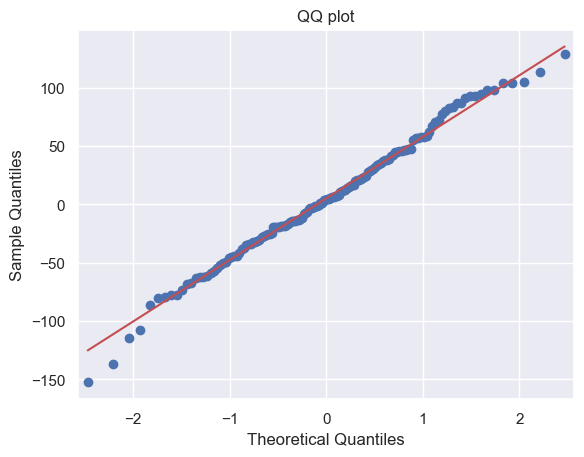

In [4]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.title('QQ plot')
plt.show()

De nuevo, meditemos, ¿Que nos dice esto sobre la distribución de nuestros residuales?.

Por ultimo, pensemos en el supuesto 4, para verificarlo visualmente podemos analizar directamente un grafico de autocorrelación:

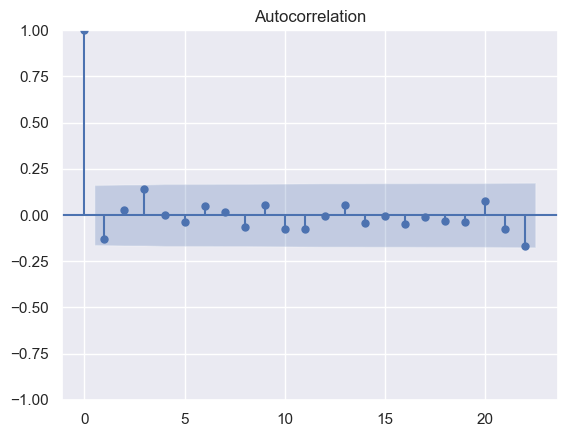

In [5]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)
plt.show()

¿Que podemos decir de este resultado? ¿Es adecuado? Para mas detalles sobre los parametros de los graficos de autocorrelación, ver [aquí](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html).

### Regularización
La regularización es una técnica utilizada en el aprendizaje automático para evitar el sobreajuste de un modelo a los datos de entrenamiento. Consiste en añadir una penalización a la función de coste del modelo para disminuir la complejidad del mismo, favoreciendo así una solución más simple y generalizable. De esta manera, se busca un equilibrio entre la precisión en los datos de entrenamiento y la capacidad del modelo para generalizar a nuevos datos. Antes de presentar los ajustes hechos en cada caso, recordemos la función de penalización estandar de los modelos de regresión lineal:

$$\text{RSS}(Y,X,\beta) = \sum_{i=1}^{n}(y_i - \beta_{0} - \sum_{j=1}^{p} \beta_{j}x_{ij})^{2} $$

Aquí, $\beta_j$ son los coeficientes de la regresión, $Y$ nuestra variable dependiente, y $X$ nuestra variable independiente. Con esto en mente, definamos los métodos de regularización más comunes:

- **Regresión Ridge**
$$ \text{RSS}_{Ridge}(Y,X,\beta,\lambda) = \text{RSS}(Y,X,\beta) + \lambda\sum_{j=1}^{p}\beta_j^2 $$

  Donde $\lambda$ es un hiperparámetro que controla la fuerza de la penalización.

- **Regresión Lasso (Least Absolute Shrinkage and Selection Operator)**
$$ \text{RSS}_{Lasso}(Y,X,\beta,\lambda) = \text{RSS}(Y,X,\beta) + \lambda\sum_{j=1}^{p}|\beta_j| $$

  Donde $\lambda$ es un hiperparámetro que controla la fuerza de la penalización.

- **Elastic Net**

  Esta técnica combina las penalizaciones de la regresión ridge y la regresión Lasso en una sola técnica.
  
  $$ \text{RSS}_{Elastic\,Net}(Y,X,\beta,\lambda) = \text{RSS}(Y,X,\beta) + \lambda_1\sum_{j=1}^{p}\beta_j^2+\lambda_2\sum_{j=1}^{p}|\beta_j| $$
  
 Donde $\lambda_1$ y $\lambda_2$ son hiperparámetros que controlan la fuerza de las penalizaciones de la regresión ridge y Lasso, respectivamente.

Estos ajustes se pueden representar visualmente de la siguiente forma:

![Regularizacion](https://drive.google.com/uc?export=view&id=1kgn2Hhj5gqbD2M9q0tlCxtxCX_o66zgW)

Para más detalles, consultar el siguiente [enlace](https://online.stat.psu.edu/stat508/book/export/html/749).

Cada una de estas técnicas de regularización se utiliza para tratar diferentes problemas en la modelación estadística, tales como la multicolinealidad, el sobreajuste y la selección de características relevantes. La selección de una técnica de regularización específica depende del problema que se esté tratando y de la naturaleza de los datos.

Para ilustrar el uso de estos conceptos en Python, volveremos a nuestro ejemplo de estudio de la diabetes.

In [6]:
# Cargamos los datos
# X: Medidas biometricas del paciente
# Y: Progresión de la enfermedad despues de un año
X, y = datasets.load_diabetes(return_X_y=True)
 
# Separamos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

[**Ridge Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

Error Cuadratico Medio (MSE): 2937.563969101078 



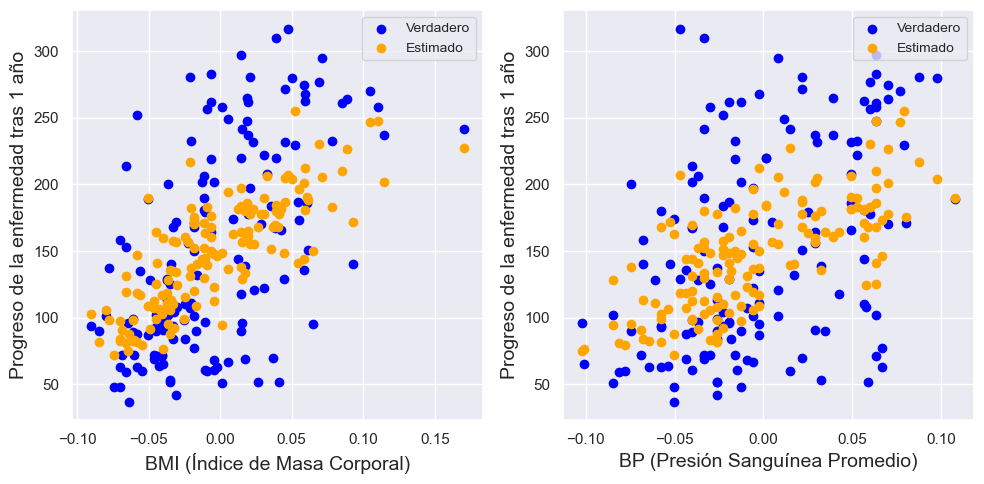

In [7]:
# Creamos un objeto de regresión lineal con regularizacion Ridge
regr = linear_model.Ridge(alpha=0.5)

# Entrenamos el modelo utilizando nuestros datos de entrenamiento
regr.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
coefs = regr.coef_
coefs_n = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

# Generamos predicciones utilizando nuestros datos de testeo
y_pred = regr.predict(X_test)

# Calculamos el MSE del ajuste
MSE = mean_squared_error(y_test, y_pred)
print('Error Cuadratico Medio (MSE):', MSE, '\n')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# Graficamos Y_test Bs Y_Pred como función de BMI (Indice de Masa Corporal)
X_plot_1 = X_test[:, np.newaxis, 2]
axs[0].scatter(X_plot_1, y_test, color='blue', label="Verdadero")
axs[0].scatter(X_plot_1, y_pred, color='orange', label="Estimado")
axs[0].set_xlabel("BMI (Índice de Masa Corporal)", fontsize="14")
axs[0].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[0].legend(fontsize="10")

# Graficamos Y_test Bs Y_Pred como función de BP (Presión Sanguínea Promedio)
X_plot_2 = X_test[:, np.newaxis, 3]
axs[1].scatter(X_plot_2, y_test, color='blue', label="Verdadero")
axs[1].scatter(X_plot_2, y_pred, color='orange', label="Estimado")
axs[1].set_xlabel("BP (Presión Sanguínea Promedio)", fontsize="14")
axs[1].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[1].legend(fontsize="10")

plt.tight_layout()
plt.show()

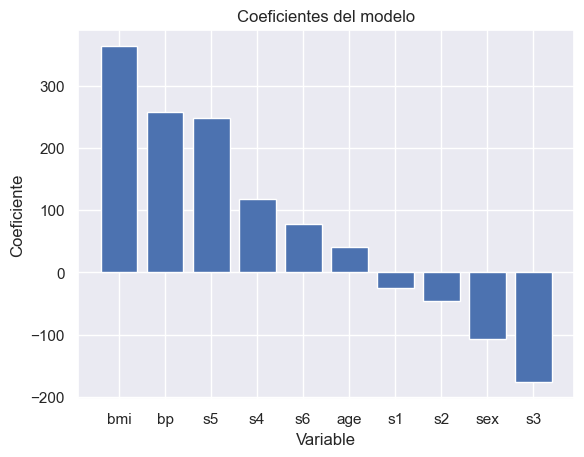

In [8]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.show()

[**Lasso Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Error Cuadratico Medio (MSE): 3065.4668902401995 



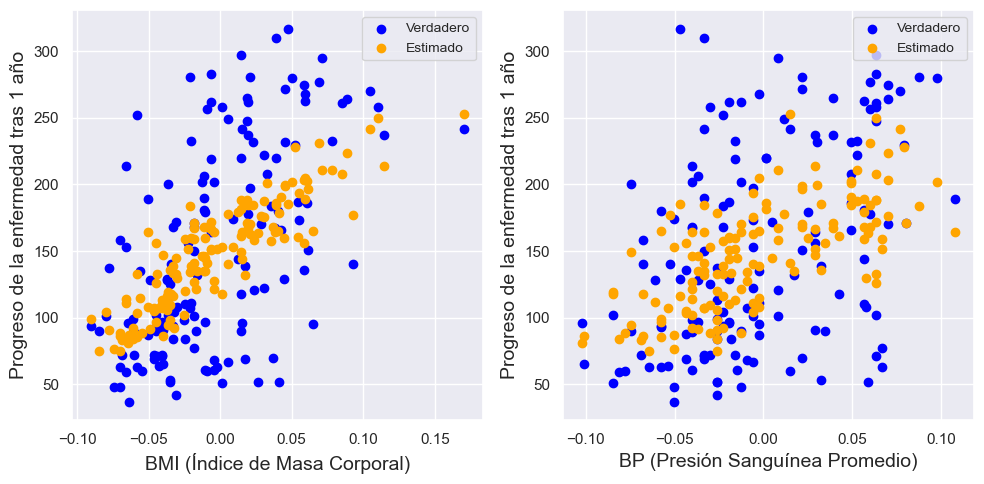

In [9]:
# Creamos un objeto de regresión lineal con regularización Lasso
regr = linear_model.Lasso(alpha=0.5)

# Entrenamos el modelo utilizando nuestros datos de entrenamiento
regr.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
coefs = regr.coef_
coefs_n = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

# Generamos predicciones utilizando nuestros datos de testeo
y_pred = regr.predict(X_test)

# Calculamos el MSE del ajuste
MSE = mean_squared_error(y_test, y_pred)
print('Error Cuadratico Medio (MSE):', MSE, '\n')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# Graficamos Y_test Bs Y_Pred como función de BMI (Indice de Masa Corporal)
X_plot_1 = X_test[:, np.newaxis, 2]
axs[0].scatter(X_plot_1, y_test, color='blue', label="Verdadero")
axs[0].scatter(X_plot_1, y_pred, color='orange', label="Estimado")
axs[0].set_xlabel("BMI (Índice de Masa Corporal)", fontsize="14")
axs[0].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[0].legend(fontsize="10")

# Graficamos Y_test Bs Y_Pred como función de BP (Presión Sanguínea Promedio)
X_plot_2 = X_test[:, np.newaxis, 3]
axs[1].scatter(X_plot_2, y_test, color='blue', label="Verdadero")
axs[1].scatter(X_plot_2, y_pred, color='orange', label="Estimado")
axs[1].set_xlabel("BP (Presión Sanguínea Promedio)", fontsize="14")
axs[1].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[1].legend(fontsize="10")

plt.tight_layout()
plt.show()

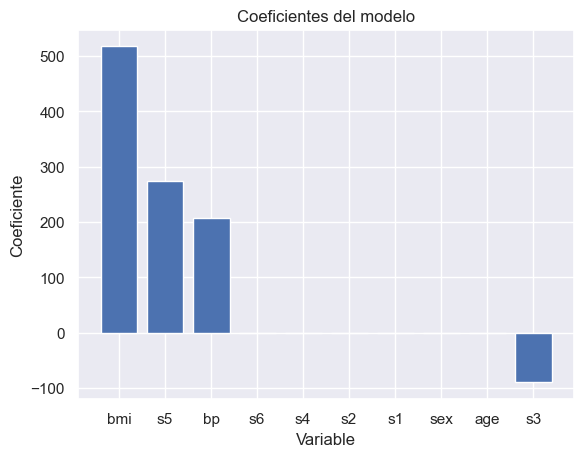

In [10]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.show()

[**Elastic Net**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

Error Cuadratico Medio (MSE): 5627.4118689858005 



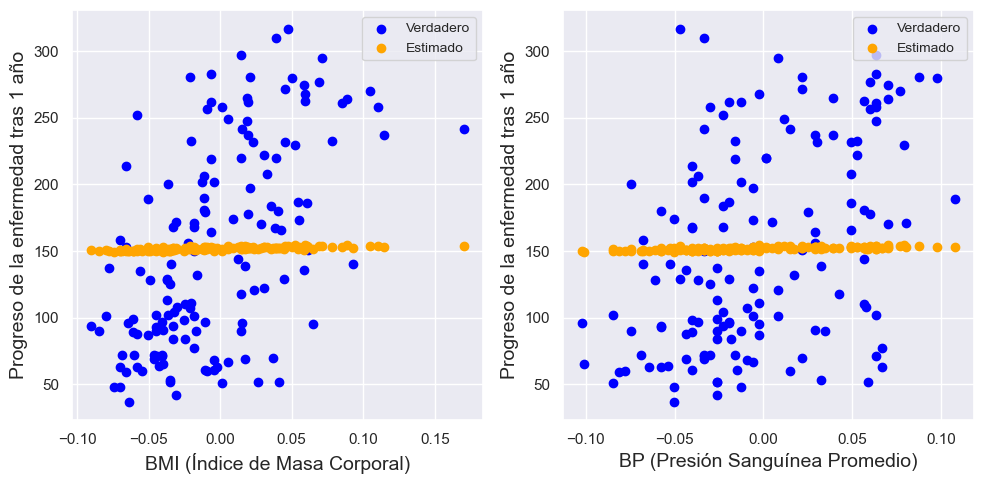

In [11]:
# Creamos un objeto de regresión lineal con regularización Elastic Net
regr = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)

# Entrenamos el modelo utilizando nuestros datos de entrenamiento
regr.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
coefs = regr.coef_
coefs_n = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

# Generamos predicciones utilizando nuestros datos de testeo
y_pred = regr.predict(X_test)

# Calculamos el MSE del ajuste
MSE = mean_squared_error(y_test, y_pred)
print('Error Cuadratico Medio (MSE):', MSE, '\n')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# Graficamos Y_test Bs Y_Pred como función de BMI (Indice de Masa Corporal)
X_plot_1 = X_test[:, np.newaxis, 2]
axs[0].scatter(X_plot_1, y_test, color='blue', label="Verdadero")
axs[0].scatter(X_plot_1, y_pred, color='orange', label="Estimado")
axs[0].set_xlabel("BMI (Índice de Masa Corporal)", fontsize="14")
axs[0].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[0].legend(fontsize="10")

# Graficamos Y_test Bs Y_Pred como función de BP (Presión Sanguínea Promedio)
X_plot_2 = X_test[:, np.newaxis, 3]
axs[1].scatter(X_plot_2, y_test, color='blue', label="Verdadero")
axs[1].scatter(X_plot_2, y_pred, color='orange', label="Estimado")
axs[1].set_xlabel("BP (Presión Sanguínea Promedio)", fontsize="14")
axs[1].set_ylabel("Progreso de la enfermedad tras 1 año", fontsize="14")
axs[1].legend(fontsize="10")

plt.tight_layout()
plt.show()

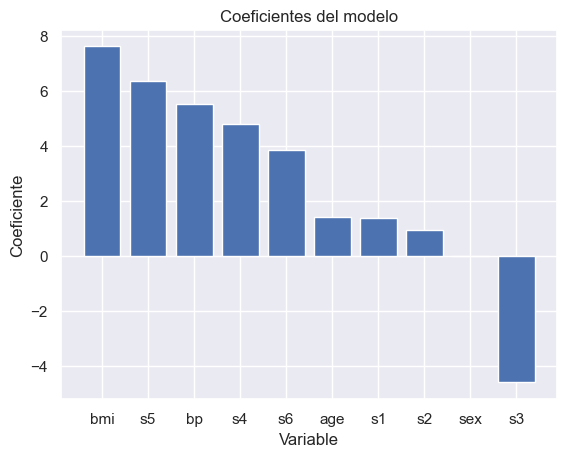

In [12]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.show()

### Fin 2nda Sesión
---

### Clasificador de soporte vectorial (SVC)

Un clasificador de soporte vectorial (SVC, por sus siglas en inglés) busca encontrar el hiperplano que mejor separa dos clases en un espacio de características. El objetivo es encontrar un límite de decisión que tenga el margen máximo con respecto a los puntos de datos de ambas clases, es decir, queremos encontrar lo siguiente:

![EjHyperplanos](https://drive.google.com/uc?export=view&id=1VuT97ZF-HnGNYfuCNqCdBL_G4x_ORLiR)

En el caso de una separación lineal, el hiperplano de separación se define por una función lineal, mientras que en el caso de una separación no lineal, se busca transformar el espacio de características a un espacio de mayor dimensión donde una separación lineal sea posible (este segundo caso sera nuestra motivación para investigar los Kernels mas adelante). Como en muchos problemas, existen multiples soluciones que pueden ayudarnos

![PossibleHP](https://drive.google.com/uc?export=view&id=1pAEq7QnJGCDB2fZbA362cFdO8_m-Al67)

Formalmente, se busca resolver el siguiente problema de optimización:

$$\min_{\beta_0, \beta, \epsilon} \frac{\|\beta\|^{2}}{2} + C\sum_{i=1}^{n}\epsilon_i$$

sujeto a

$yi(\beta_0 + \beta^{T}x_i) \ge 1-\epsilon_i, \, \, \, \, i=1,...,n$ <br>
$\epsilon_i \ge 0, \, \, \, \, i=1,...,n$

donde $y_i$ es la clase del i-ésimo punto de datos, $x_i$ es su vector de características, $\beta$ es el vector de pesos, $\beta_0$ es la ordenada al origen y $\epsilon_i$ es la holgura (margen de error) permitida para el i-ésimo punto de datos. $C$ es el hiperparámetro de regularización que controla el balance entre maximizar el margen y minimizar las violaciones de las restricciones. A esta formulación se le conoce formalmente como el C-SVC en su forma primaria, existen muchas modificaciones menores del SVC asi como representaciones duales de los problemas de optimización, estos detalles pueden consultarse en la publicación original que SkLearn usa como [referencia](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf). Un ejemplo de una solución optima en 3-dimensiones se muestra a continuación, soluciones de mas alta dimensionalidad solo pueden interpretarse a travez de sus parametros.

![OptHP3D](https://drive.google.com/uc?export=view&id=1biFx3zQybRhbj9_SG2tePgWnz5DfHRbP)


In [13]:
# Descomentar las siguientes dos celdas para poder acceder a los datos 
# de su drive
# from google.colab import drive
# drive.mount('/content/drive')

# Leemos nuestros datos
# wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS&ML4Finance/"+\
#                    "6th Gen/Módulo IV/Material/Dependencias/"+\
#                    "winequality-white.csv", sep=';')

wine = pd.read_csv("../Datasets/winequality-white.csv", sep=";")

# Separamos nuestra matriz de diseño y nuestra variable objetivo
X = wine.drop(['quality'], axis=1)
y = wine['quality']

# Segregamos la muestra en entrenamiento y testeo
X_train, X_test,y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=42)

El puntaje del classificador es: 0.5036734693877551



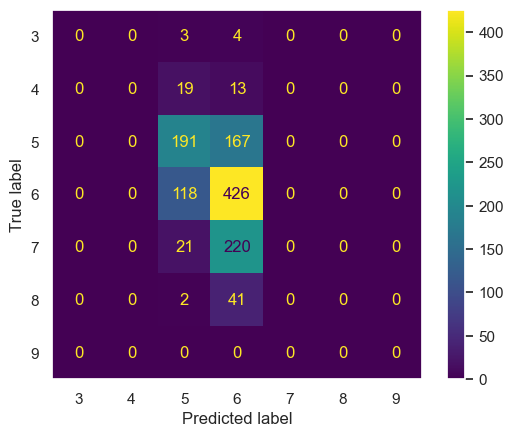

In [14]:
# Inicializamos nuestro clasificador 
clf = svm.SVC(kernel='linear')

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
H = clf.coef_
M = [np.linalg.norm(H[:,c], ord=2) for c in range(H.shape[1])]
coefs = M / sum(M)
coefs_n = list(X.columns)

# Utilizamos X_test para generar predicciones
y_pred = clf.predict(X_test)
residuals = y_test - y_pred

# Imprimimos el puntaje del clasificador
print("El puntaje del classificador es:", clf.score(X_test, y_test))
print()

# Generamos una visualización
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

Pensemos un momento en lo que los coeficientes `coef_` del modelo nos dicen... una forma de darle interpretación a estos coeficientes es analizar la magnitud relativa del vector de coordenadas en cada dimensión (variable independiente).

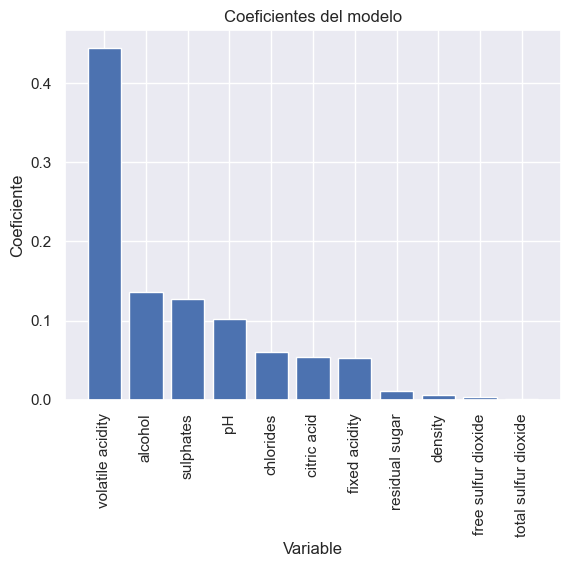

In [15]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.xticks(rotation=90)
plt.show()

### Escalamiento de datos

La mayoría de los clasificadores y regresores de scikit-learn asumen/requieren que los datos de entrenamiento se hayan escalado adecuadamente. Por ejemplo, la documentación de [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) dice (Traducido al español):

>*La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático: podrían comportarse mal si las características individuales no se parecen más o menos a datos normalmente distribuidos estándar (por ejemplo, gaussianos con media 0 y varianza unitaria)..*

>*Por ejemplo, muchos elementos utilizados en la función objetivo de un algoritmo de aprendizaje (como el kernel RBF de las máquinas de vectores de soporte o los regularizadores L1 y L2 de los modelos lineales) suponen que todas las características están centradas alrededor de 0 y tienen una varianza del mismo orden. Si una característica tiene una varianza que es órdenes de magnitud mayor que otras, puede dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se espera.*

Para entender esta idea, utilizaremos un clasificador basado en maquinas de soporte vectorial (SVC por sus siglas en inglés) para determinar predecir el nivel de calidad de una serie de muestras de vinos.

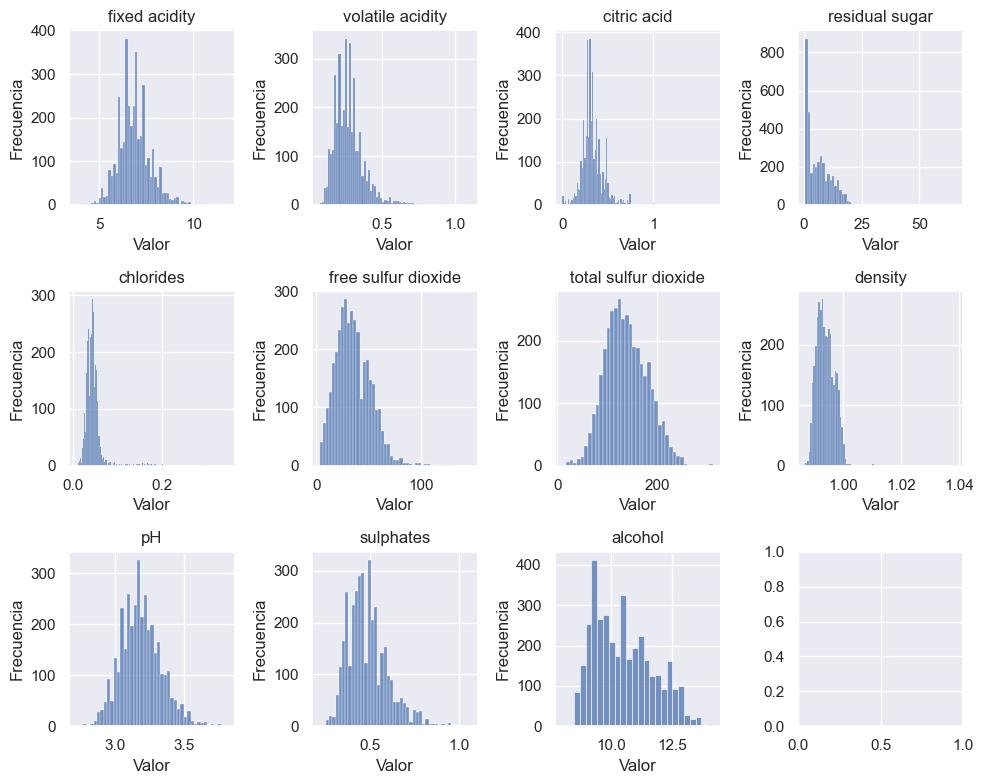

In [16]:
# Graficamos las distribuciones antes del escalado
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
for i in range(len(X_train.columns)):
  row = i // 4
  col = i % 4
  ax = sns.histplot(data=X_train[X_train.columns[i]], ax=axs[row,col])
  ax.set(title=X_train.columns[i], xlabel='Valor', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

Ahora abordamos la escalabilidad de los datos. scikit-learn tiene herramientas de preprocesamiento que hacen que esto sea simple de implementar.

Consulte la Guía del usuario Sec. 6.3. Preprocesamiento de datos y lea en particular el comienzo de esa documentación a través de Sec. 6.3.1. Consulte también la documentación sobre el StandardScaler. Tenga en cuenta que el escalador tiene métodos

- `fit()`: Calcula la media y la desviación estándar que se usarán para escalar posteriormente.

- `fit_transform()`: Ajusta los datos y luego los transforma.

- `transform()`: Realiza la estandarización centrando y escalando
además de otros métodos. 

La celda de abajo escala la matriz de diseño. Es importante que comprenda lo que se está haciendo aquí. El escalador se ajusta a X_train. Esto determina las medias y desviaciones estándar de los datos de entrenamiento. Luego, esto se utiliza para escalar tanto X_train como X_test. Debemos escalar ambos: X_train debe escalarse porque el algoritmo de aprendizaje automático (svm.SVC en este caso) necesita datos escalados apropiadamente. Necesitamos escalar X_test de la misma manera. Sin embargo, lo que no podemos hacer es usar X_test para determinar la escala. Recuerde, nunca puede usar los datos de prueba en ninguna parte de los procesos de aprendizaje.

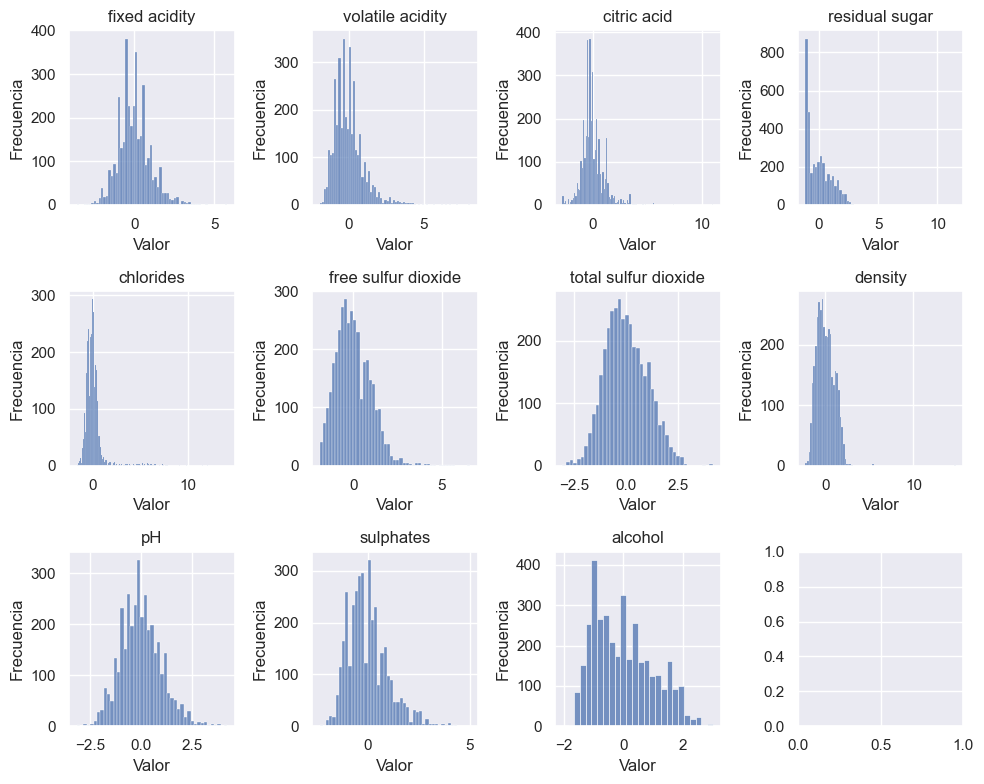

In [17]:
# Escalamos la matriz de diseño
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_S = X_train.copy()
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Graficamos las distribuciones antes del escalado
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
for i in range(len(X_train_S.columns)):
  row = i // 4
  col = i % 4
  ax = sns.histplot(data=X_train[:,i], ax=axs[row,col])
  ax.set(title=X_train_S.columns[i], xlabel='Valor', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

Comparar las distribuciones no escaladas Vs las escaladas es importante, por que si bien las escalas de los ejes X y Y han cambiado, podemos observar que la forma de las distribuciones, que es lo que efectivamente captura el comportamiento de nuestras variables, no ha cambiado. Para validar como ha beneficiado el escalamiento al ajuste de nuestro modelo, grafiquemos nuevamente su performance

El puntaje del classificador es: 0.5077551020408163



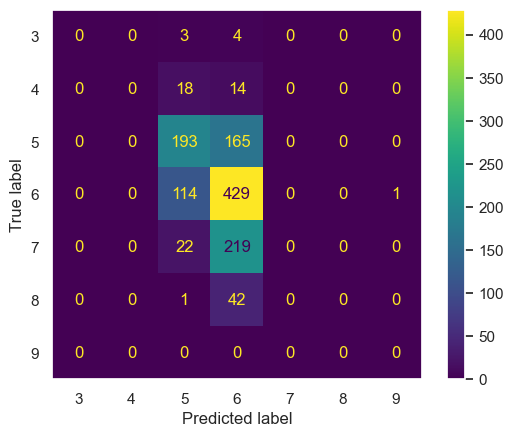

In [18]:
# Inicializamos nuestro clasificador 
clf = svm.SVC(kernel='linear')

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
H = clf.coef_
M = [np.linalg.norm(H[:,c], ord=2) for c in range(H.shape[1])]
coefs = M / sum(M)
coefs_n = list(X.columns)

# Utilizamos X_test para generar predicciones
y_pred = clf.predict(X_test)
residuals = y_test - y_pred

# Imprimimos el puntaje del clasificador
print("El puntaje del classificador es:", clf.score(X_test, y_test))
print()

# Generamos una visualización
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

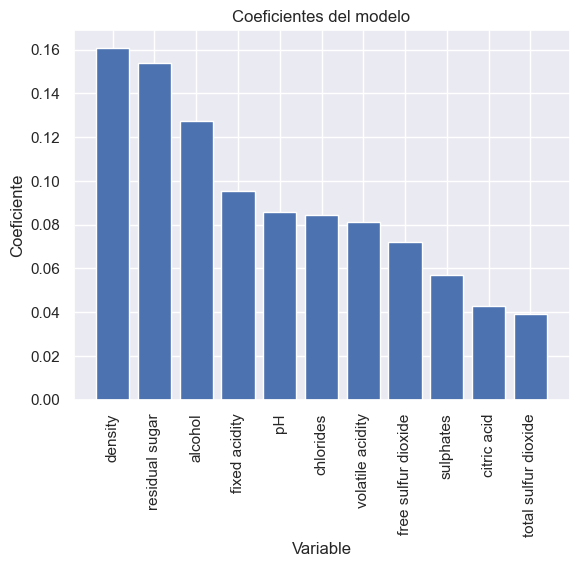

In [19]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.xticks(rotation=90)
plt.show()

### Fin 3ra Sesión
---

### Selección de Hiperpáramtetros y la Validación Cruzada ([Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation))

Los algoritmos de aprendizaje automático (llamados estimadores en scikit-learn) tienen hiperparámetros que controlan el comportamiento del modelo. Para datos de entrenamiento particulares, se ajusta el hiperparámetro utilizando validación cruzada. Por lo general, se examina una cuadrícula de hiperparámetros (con frecuencia espaciados de forma logarítmica). La validación cruzada devuelve un conjunto de puntajes a partir del cual se puede seleccionar la mejor opción para los hiperparámetros. Los puntajes de validación cruzada se determinan mediante la medida de rendimiento seleccionada, como el Error Cuadrático Medio (MSE). En la práctica, la puntuación de scikit-learn es tal que los puntajes grandes son buenos y los puntajes bajos son malos. Esto lleva a una pequeña torpeza en los signos, pero no es demasiado difícil en la práctica. Un diagrama sencillo del funcionamiento de este proceso es el siguiente: 

![CVDiagram](https://drive.google.com/uc?export=view&id=1twasJzl3U3j3DaK3icthxo7AuSen247I)

Ahora nos enfocaremos en la exploración del espacio de hiperparámetros. Haremos esto "manualmente" con un bucle for en lugar de usar algo como `model_selection.GridSearchCV`.

El clasificador `svm.SVC` tiene un hiperparámetro C que controla la regularización (hablaremos de esto más adelante). Aquí consideramos una rejilla de valores C_vals, recorremos estos valores estableciendo el clasificador con el valor correspondiente de C. Luego graficamos la media y la desviación estándar de las puntuaciones.

Se puede recuperar scores 1 a 1? Mueve % de testeo?

In [20]:
cross_val_score(clf, X_train, y_train)

array([0.53605442, 0.52789116, 0.52789116, 0.52861035, 0.52043597])

100%|██████████| 5/5 [00:12<00:00,  2.44s/it]


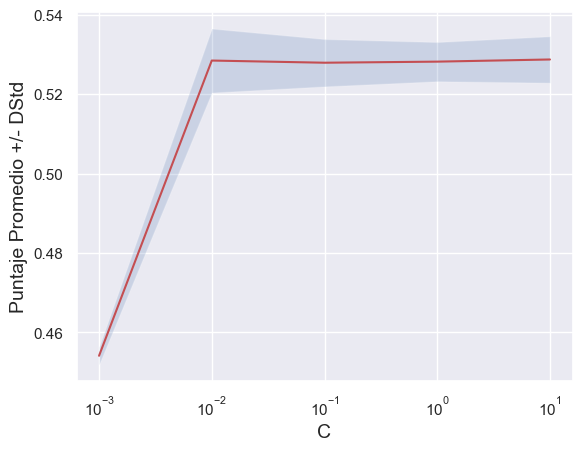

In [21]:
# Establece el espacio de busqueda
C_vals = [0.001, 0.01, 0.1, 1, 10]
# Cantidad de casos -> depende de la cantidad de Cs que tengamos 
Ncases = len(C_vals)
score_mean = np.zeros(Ncases)
score_std = np.zeros(Ncases)
for k in tqdm(range(Ncases)):
    # Calibramos el modelo con los hiperpárametros actuales
    clf = svm.SVC(kernel='linear',C=C_vals[k])
    # A continuación hacemos la validación cruzada
    scores = cross_val_score(clf,X_train,y_train)  
    # Guardamos el promedio y la desviación estandar de los puntajes
    score_mean[k] = scores.mean()
    score_std[k] = scores.std()

# Graficamos los puntajes como función de los hiperpárametros
print()
plt.semilogx(C_vals,score_mean,'r')
plt.fill_between(C_vals,score_mean-score_std,score_mean+score_std,alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("Puntaje Promedio +/- DStd", fontsize="14")
plt.show()

De forma equivalente, utilizando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Se generó un grid usando los hiperparámetros y se está utilizando para evaluar.

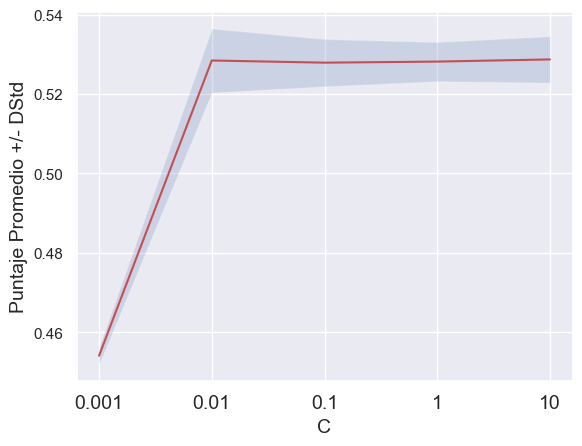

In [22]:
from sklearn.model_selection import GridSearchCV

# Establece el espacio de búsqueda
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Definimos el modelo SVM y la validación cruzada con GridSearchCV
clf = svm.SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extraemos los resultados de GridSearchCV
scores = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
C_vals = [str(val) for val in param_grid['C']]

# Graficamos los puntajes como función de los hiperparámetros
plt.semilogx(param_grid['C'], scores, 'r')
plt.fill_between(param_grid['C'], scores - stds, scores + stds, alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("Puntaje Promedio +/- DStd", fontsize="14")
plt.xticks(param_grid['C'], C_vals, fontsize="14")
plt.show()

La interpretación de esta gráfica requiere un poco de cuidado. Claramente, los valores pequeños de C no son buenos. Elegiría un valor de C=0.1 o C=1 basado en la gráfica anterior, ya que parece estar aproximadamente donde el puntaje se ha estabilizado efectivamente.

El puntaje del classificador es: 0.5077551020408163



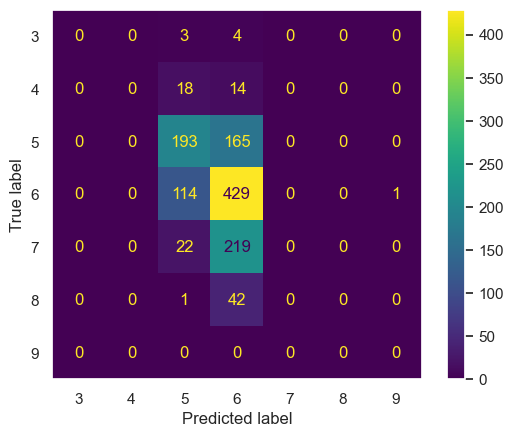

In [23]:
# Inicializamos nuestro clasificador 
clf = svm.SVC(kernel='linear',C=1)

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Guardamos los coeficientes y sus nombres
H = clf.coef_
M = [np.linalg.norm(H[:,c], ord=2) for c in range(H.shape[1])]
coefs = M / sum(M)
coefs_n = list(X.columns)

# Utilizamos X_test para generar predicciones
y_pred = clf.predict(X_test)

# Imprimimos el puntaje del clasificador
print("El puntaje del classificador es:", clf.score(X_test, y_test))
print()

# Generamos una visualización
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

Para descubrir por que no hay mejora en el score del modelo, veamos la documentación de nuestra función [SVM.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

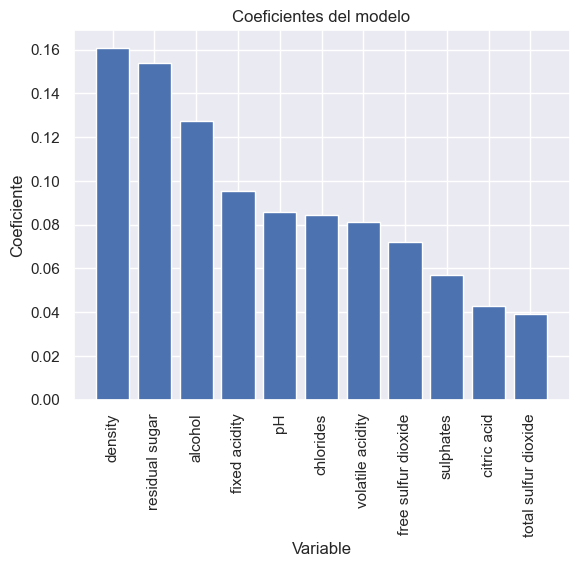

In [24]:
# Modificamos nuestros datos para que esten ordenados (mas facil de leer)
idx = np.argsort(coefs)[::-1]
coefs_sorted = [coefs[i] for i in idx]
coefs_n_sorted = [coefs_n[i] for i in idx]

# Creamos un grafico de barras que ilustre la relevancia 
plt.bar(coefs_n_sorted, coefs_sorted)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo')
plt.xticks(rotation=90)
plt.show()

### [Descenso de Gradiente](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

El _Descenso de Gradiente_ es un algoritmo de optimización iterativo de primer orden utilizado para encontrar un mínimo / máximo local de una función dada. Este método se utiliza comúnmente en aprendizaje automático (ML) y aprendizaje profundo (DL) para minimizar una función de costo / pérdida y así encontrar los parametros optimos para un modelo. La idea general de la gradiente descendiente es utilizar la derivada de una función para recorrerla, en este contexto podemos interpretar la derivada como la dirección en la que nos vamos a mover en el espacio de nuestra función.

En esta introducción al algoritmo, nos enfocaremos en el metodo de gradiente descendiente _basico_ (hay muchas modificaciones sobre este algoritmo, pero explorar el caso base es suficiente por ahora), y nos enfocaremos en funciones generales en lugar de funciones de perdida.

Este algoritmo no funciona para cualquier función, existen dos requisitos especificos que deben cumplir las funciones, que son:

- Diferenciable
- Convexa

Para que una función sea diferenciable, debe de contar con una derivada en cada punto en su dominio, por ejemplo:

![DiffExamples](https://drive.google.com/uc?export=view&id=1hLYS9I3_zuTrX5ZMHcCMlUt0JURbaEaM)

y como contra-ejemplo:

![NonDiffExamples](https://drive.google.com/uc?export=view&id=10H_gE5-XChrq3E7GNbTFK2pYZ3QojDJ3)

Respecto a la convexidad, en terminos matematicos solicitamos que la siguiente desigualdad se cumpla:

$$ f(\lambda x_1 + (1-\lambda)x_2) \le \lambda f(x_1) + (1-\lambda)f(x_2) $$

donde $\lambda$ representa la localización de un punto en una linea y su valor debe estar entre 0 (extremo izquierdo) y 1 (extremo derecho). De forma visual podemos entender la convexidad con lo siguiente:

![ConvxExamples](https://drive.google.com/uc?export=view&id=1qygGLCZsW4yTLqpfVx0FBE-picNUEUg3)

Debemos tambien explorar las funciones problematicas para este algoritmo, como lo son las funciones con _puntos montura_.

![SadPointEx](https://drive.google.com/uc?export=view&id=1GQHt4hXTkGyRRdgFqpsUNLyI47P54U9D)

Los puntos montura pueden identificarse si al evaluar su primera y segunda derivada son iguales a 0, es decir

$$ \frac{d f(x)}{dx} = \frac{d^2 f(x)}{dx^2} = 0 $$

Por supuesto, nuestras funciones de interes muchas veces son de varias dimensiones, y en ellas tambien existe la idea de puntos montura, como se puede ver a continuación:

Grafico de $z = x^2 - y^2$

![3DSadPoint](https://drive.google.com/uc?export=view&id=1VYtizRgZ-1WZtwwYQ5hU5qPK5E0dWqWt)

El algoritmo de gradiente descendiente va a explorar el espacio de nuestra funcion saltando de un punto a otro utilizando la gradiente de su punto actual, escalandola por su _ratio de aprendizaje_ y substrayendo su valor actual (con esto nos quedamos unicamente con el cambio generado por nuestro movimiento), esto se puede expresar con:

$$ p_{n+1} = p_n - \eta \nabla f(p_n) $$

Donde $ p_{n+1}$ representa el punto de destino, $ p_{n} $ el punto actual, $\eta$ es el ratio de aprendizaje, y $\nabla f(p_n)$ es la gradiente (o derivada de $f$ ) evaluada en $p_n$. En pocas palabras, el algoritmo se puede resumir en el siguiente proceso:

1. Selecciona un punto inicial $p_0$
2. Calcula la gradiente $\nabla f(p_0)$
3. Muevete en la direccion opuesta a la gradiente de acuerdo al ratio de aprendizaje ($- \eta \nabla f(p_n)$)
4. Repide los pasos 2 y 3 hasta que alguno de los siguientes se cumpla:
  - Se alcanzo el numero maximo de iteraciones
  - Se alcanzo el minimo de la funcion de acuerdo a la tolerancia de convergencia.

Ejemplo:


In [25]:
import numpy as np

def gradient_descent(start, gradient, learn_rate, max_iter, tol=0.01):
  steps = [start] # history tracking
  x = start

  for _ in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff)<tol:
      break    
    x = x - diff
    steps.append(x) # history tracing

  return steps, x

def func1(x):
  return x**2-4*x+1

def gradient_func1(x):
  return 2*x - 4

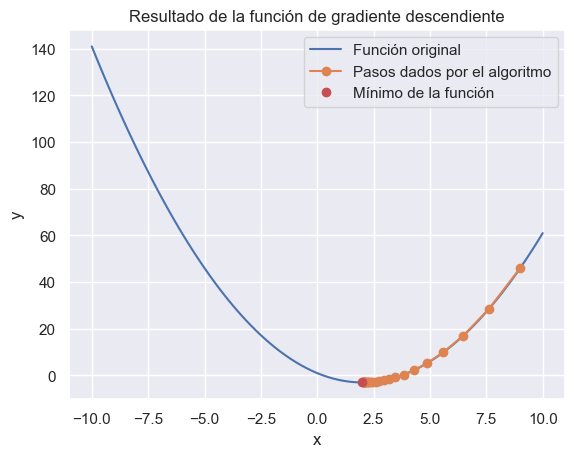

In [26]:
history, result = gradient_descent(9, gradient_func1, 0.1, 100)

# Graficamos la función original y los pasos dados por el algoritmo
x = np.linspace(-10, 10, 100)
y = func1(x)
plt.plot(x, y, label='Función original')
plt.plot(history, [func1(x) for x in history], 'o-',
         label='Pasos dados por el algoritmo')
min_x = 2
min_y = func1(min_x)
plt.plot(min_x, min_y, 'ro', label='Mínimo de la función')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Resultado de la función de gradiente descendiente')
plt.legend()
plt.show()

In [27]:
def func2(x):
  return x**4 - 2*x**2

def gradient_func2(x):
  return 4 * x**3 - 4 * x

def gradient2_func2(x):
  return  12 * x**2 - 4

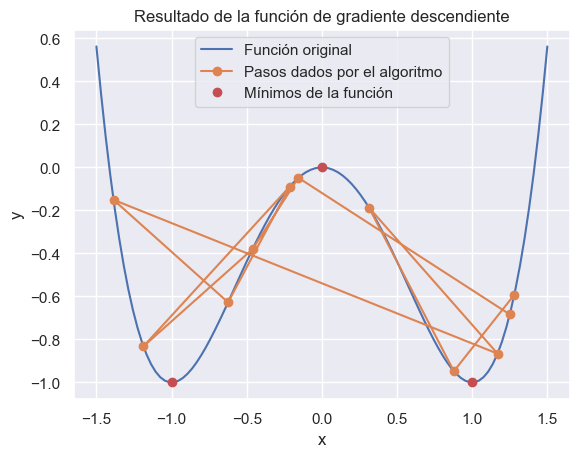

In [28]:
# history, result = gradient_descent(1.25, gradient_func2, 0.1, 10)
history, result = gradient_descent(1.25, gradient_func2, 0.5, 10)

# Graficamos la función original y los pasos dados por el algoritmo
x = np.linspace(-1.5, 1.5, 100)
y = func2(x)
plt.plot(x, y, label='Función original')
plt.plot(history, [func2(x) for x in history], 'o-',
         label='Pasos dados por el algoritmo')
min_x = [-1, 0, 1]
min_y = [func2(x) for x in min_x]
plt.plot(min_x, min_y, 'ro', label='Mínimos de la función')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Resultado de la función de gradiente descendiente')
plt.legend()
plt.show()

#print('\n',history)